In [1]:
import sys
sys.path.append("/home/ckemere/Code/PythonDataAnalysis/Caleb/Tools")
import frank_lab

In [2]:
fileroot = '/home/ckemere/Data/Frank/';

In [3]:
import os
anim_dirs = [(d, os.path.join(fileroot,d)) for d in os.listdir(fileroot) if os.path.isdir(os.path.join(fileroot,d))]
print(anim_dirs)


[('Ten', '/home/ckemere/Data/Frank/Ten'), ('Bon', '/home/ckemere/Data/Frank/Bon'), ('Cor', '/home/ckemere/Data/Frank/Cor'), ('Con', '/home/ckemere/Data/Frank/Con'), ('Dud', '/home/ckemere/Data/Frank/Dud'), ('Fra', '/home/ckemere/Data/Frank/Fra'), ('Eig', '/home/ckemere/Data/Frank/Eig'), ('Fiv', '/home/ckemere/Data/Frank/Fiv'), ('Mil', '/home/ckemere/Data/Frank/Mil')]


In [4]:
for (anim, dd) in anim_dirs:
    print(anim)
    print(dd)

Ten
/home/ckemere/Data/Frank/Ten
Bon
/home/ckemere/Data/Frank/Bon
Cor
/home/ckemere/Data/Frank/Cor
Con
/home/ckemere/Data/Frank/Con
Dud
/home/ckemere/Data/Frank/Dud
Fra
/home/ckemere/Data/Frank/Fra
Eig
/home/ckemere/Data/Frank/Eig
Fiv
/home/ckemere/Data/Frank/Fiv
Mil
/home/ckemere/Data/Frank/Mil


In [5]:
task = {}
for (anim, dd) in anim_dirs:
    task[anim] = frank_lab.load_data(dd, datatype='task')

Loading tentask07.mat
Loading tentask06.mat
Loading tentask03.mat
Loading tentask01.mat
Loading tentask04.mat
Loading tentask02.mat
Loading tentask05.mat
Loading bontask08.mat
Loading bontask09.mat
Loading bontask05.mat
Loading bontask03.mat
Loading bontask10.mat
Loading bontask06.mat
Loading bontask04.mat
Loading bontask07.mat
Loading Cortask06.mat
Loading Cortask05.mat
Loading Cortask09.mat
Loading Cortask08.mat
Loading Cortask07.mat
Loading Cortask01.mat
Loading Cortask03.mat
Loading Cortask02.mat
Loading Cortask04.mat
Loading contask02.mat
Loading contask05.mat
Loading contask03.mat
Loading contask04.mat
Loading contask01.mat
Loading contask06.mat
Loading dudtask06.mat
Loading dudtask03.mat
Loading dudtask02.mat
Loading dudtask04.mat
Loading dudtask05.mat
Loading dudtask01.mat
Loading fratask03.mat
Loading fratask06.mat
Loading fratask02.mat
Loading fratask05.mat
Loading fratask11.mat
Loading fratask10.mat
Loading fratask07.mat
Loading fratask09.mat
Loading fratask04.mat
Loading fr

In [6]:
cellinfo = {}
for (anim, dd) in anim_dirs:
    cellinfo[anim], _ = frank_lab.load_data(dd, datatype='cellinfo')

Loading tencellinfo.mat
Loading boncellinfo.mat
Loading Corcellinfo.mat
Loading concellinfo.mat
Loading dudcellinfo.mat
Loading fracellinfo.mat
Loading Eigcellinfo.mat
Loading Fivcellinfo.mat
Loading milcellinfo.mat


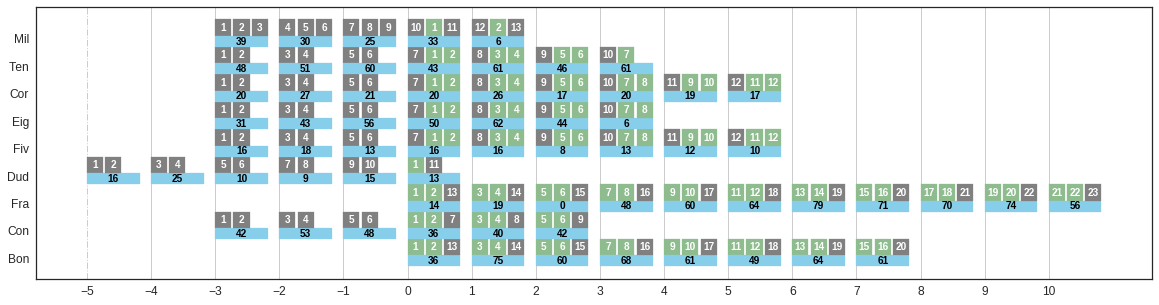

In [7]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize': (12, 4),'lines.linewidth': 2, 'font.size': 18, 
            'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style('white')

w = 0.25 # make patches a little less than 1/3rd to provide spacing
h = 0.6
dh = 0.4

fig, ax = plt.subplots(figsize=(20, 5))

animals = ['Bon', 'Con', 'Fra', 'Dud', 'Fiv', 'Eig', 'Cor', 'Ten', 'Mil']

rowidx = 0
rownames = []
for an in animals:
    rownames.append(an)
    tt = task[an].query('type=="run"')
    day_first_B = tt.query('description=="TrackB"').query('exposure == 1.0')['Day']

    for index, row in tt.iterrows() :
        # find first TrackA exposure for each day
        day = row['Day'] - day_first_B
        ep = row['Epoch'] // 2 # runs are always 1, 3, 5 - integer division gives us 0, 1, 2
        x = day + ep / 3.5 # offset within day is by epoch
        
        if (row['description'] == 'TrackA'):
            tag = '{:d}'.format(int(row['exposure']))
            r = mpatch.Rectangle((x,rowidx + dh), w, h, color='grey')

        else :
            tag = '{:d}'.format(int(row['exposure']))
            r = mpatch.Rectangle((x,rowidx + dh), w, h, color='darkseagreen')

        ax.add_patch(r)
        cx = x + w/2.0
        cy = rowidx + dh + h/2.0

        ax.annotate(tag, (cx, cy), color='w', weight='bold', 
                    fontsize=10, ha='center', va='center')


        if (ep == 0):
            dd = row['Day']
            ncells = len(cellinfo[an].query('Day==@dd').query('Epoch==0'))
            rcells = mpatch.Rectangle((day,rowidx), 2/3.5 + w, dh, color='skyblue')
            ax.add_patch(rcells)
            cy = rowidx + dh/2.0

            ax.annotate('{:d}'.format(ncells), (x + (2/3.5 + w)/2, cy), color='k', weight='bold', 
                        fontsize=10, ha='center', va='center')
        
    rowidx = rowidx + 1

ax.autoscale_view(True,True,True)
ax.set_yticks(np.arange(rowidx)+h/2)
ax.set_xticks(np.arange(-5,11))
ax.set_yticklabels(rownames)
ax.xaxis.grid(True)
ax.get_xgridlines()[0].set_linestyle('-.')
plt.show()